<a href="https://colab.research.google.com/github/Bavitayadav8/Bavitayadav8/blob/main/Assignment_4%2C_Task_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston Housing Dataset

Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each  

case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


 1-Aim

1.To implement a linear regression with regularization via gradient descent.

2.to implement gradient descent with Lp norm, for 3 different values of p in (1,2]

3.To contrast the difference between performance of linear regression Lp norm and L2 norm for these 3 different values.

4.Tally that the gradient descent for L2 gives same result as matrix inversion based solution.

All the code is written in a single python file. The python program accepts the data directory path as input where the train and test csv files reside. Note that the data directory will contain two files train.csv used to train your model and test.csv for which the output predictions are to be made. The output predictions get written to a file named output.csv. The output.csv file should have two comma separated columns [ID,Output].


2.Working of Code

.NumPy library would be required, so code begins by importing it

.Import phi and phi_test from train and test datasets using NumPy's loadtxt function

.Import y from train dataset using the loadtxt function

.Concatenate coloumn of 1s to right of phi and phi_test

.Apply min max scaling on each coloumn of phi and phi_test
Apply log scaling on y

.Define a function to calculate change in error function based on phi, w and p norm 

.Make a dictionary containing filenames as keys and p as values


.For each item in this dictionary
     
     Set the w to all 0s
     
     Set an appropriate value for lambda and step size
     
     Calculate new value of w
     
     Repeat steps until error between consecutive ws is less than threshold

     Load values of id from test data file
     
     Calculate y for test data using phi test and applying inverse log
     
     Save the ids and y according to filename from dictionary


3.Feature Engineering

      Columns of phi are not in same range, this is because their units are   different i.e phi is ill conditioned

      So, min max scaling for each column is applied to bring them in range 0-1
Same scaling would be required on columns of phi test

     Log scaling was used on y. This was determined by trial and error

4.Comparison of performance
  
  (p1=1.75, p2=1.5, p3=1.3)
      
      As p decreases error in y decreases

      As p decreases norm of w increases but this can be taken care by     increasing lambda

      As p decreases number of iterations required decreases


5.Tuning of Hyperparameter

     If p is fixed and lambda is increased error decreases up to a certain lambda, then it starts rising
     
     So, lambda was tuned by trial and error.
     
     Starting with 0, lambda was increased in small steps until a minimum error was achieved.

6.Comparison of L2 gradient descent and closed form
       
       .Error from L2 Gradient descent were 4.43268 and that from closed form solution was 4.52624.
       
       .Errors are comparable so, the L2 gradient descent performs closely with closed form solution.


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
#data = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV ']

In [84]:
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [86]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [87]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [88]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [89]:
df = pd.DataFrame(boston.data)

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [91]:
df.columns = boston.feature_names

In [92]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [93]:
boston.target.shape

(506,)

In [94]:
df['PRICE'] = boston.target

In [95]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

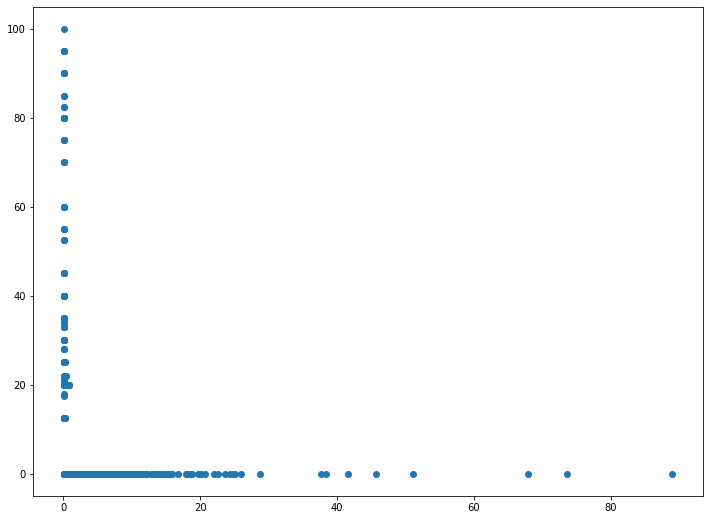

In [97]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
plt.scatter(x, y)
plt.show()

In [98]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*x+ c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-0.0712408634468409 2.080411870065145


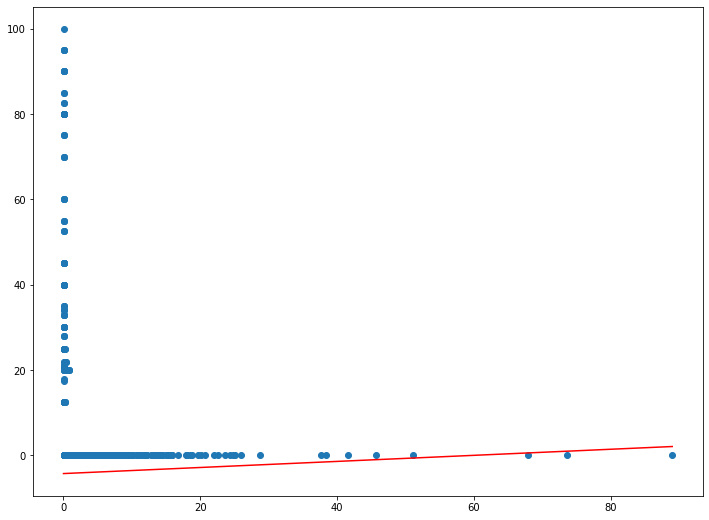

In [99]:
y_pred = m*x + c

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy.lib.function_base import gradient 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]
y=df['PRICE']
LR = LinearRegression()
LR.fit(x,y)
#prediction = LR.predict(x)
#print("Mean square error: ",mean_squared_error(y,prediction))

LinearRegression()

In [102]:
prediction = LR.predict(x)
print("Mean square error: ",mean_squared_error(y,prediction))


Mean square error:  21.894831181729202


In [103]:
ridge = Ridge(alpha=1)
ridge.fit(x,y)
print(ridge.score(x,y))

0.7388703133867616


In [104]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]
y=df['PRICE']
LR = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

LR.fit(x_test,y_test)
ridge.fit(x_test,y_test)
lasso.fit(x_test,y_test)
print("coffi and intercept LR: ",LR.coef_,LR.intercept_)
print("coffi and intercept LR: ",ridge.coef_,LR.intercept_)
print("coffi and intercept LR: ",lasso.coef_,LR.intercept_)

prediction = LR.predict(x_test)
print("mean square error : ",mean_squared_error(y_test,prediction))

coffi and intercept LR:  [-2.09957889e-02  6.01264618e-02  1.00181452e-01  5.81451403e+00
 -1.04203206e+01  5.49391160e+00 -8.72340008e-03 -1.45382773e+00
  2.75869290e-01 -2.12166855e-02 -7.13900287e-01  9.31329401e-03
 -4.50633112e-01] 19.498555201636847
coffi and intercept LR:  [-0.01952377  0.0621454   0.06929705  5.46894439 -2.64859091  5.35508392
 -0.01342701 -1.37261269  0.26543721 -0.02260234 -0.6538937   0.0092213
 -0.47761533] 19.498555201636847
coffi and intercept LR:  [-0.0196885   0.07940902  0.          0.         -0.          1.74171732
  0.02718481 -1.23081409  0.35776005 -0.02945266 -0.50061904  0.00584574
 -0.72860823] 19.498555201636847
mean square error :  18.99741565248753


In [105]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]
y=df['PRICE']
LR = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

LR.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
print("coffi and intercept LR: ",LR.coef_,LR.intercept_)
print("coffi and intercept LR: ",ridge.coef_,LR.intercept_)
print("coffi and intercept LR: ",lasso.coef_,LR.intercept_)

prediction = LR.predict(x_train)
print("mean square error : ",mean_squared_error(y_train,prediction))

coffi and intercept LR:  [-1.02392707e-01  5.15829198e-02  1.39966574e-02  3.31999007e+00
 -1.76654231e+01  3.79701487e+00  4.69274088e-03 -1.57919019e+00
  3.18254317e-01 -1.34078455e-02 -8.89229998e-01  1.12044901e-02
 -5.35484410e-01] 35.27693072396502
coffi and intercept LR:  [-9.99669390e-02  5.25769183e-02 -3.17592484e-02  3.27862422e+00
 -9.27867233e+00  3.84346826e+00 -3.05405005e-03 -1.46072434e+00
  2.94163925e-01 -1.35009486e-02 -7.84380849e-01  1.19273991e-02
 -5.44829328e-01] 35.27693072396502
coffi and intercept LR:  [-0.03763351  0.04986958 -0.          0.         -0.          1.07136553
  0.02611993 -0.73305711  0.26201334 -0.01563453 -0.65731274  0.01031563
 -0.79753524] 35.27693072396502
mean square error :  24.0477858585655


In [ ]:
import numpy as np

# Import phi from train data set
phi = np.loadtxt('data/train.csv', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14)))

# Import y from train data set
y = np.loadtxt('data/train.csv', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)

# Import phi_test from test data set
phi_test = np.loadtxt('data/test.csv', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))


# Add a cloloumn of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

# Min Max scaling for phi and phi_test (Feature Engineering)
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)

# Log scaling on y
y = np.log(y)


# Function to calculate change in error function
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw


# Dictionary containing filenames as keys and p as values
filenames = {'output.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lambd = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('data/test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))

    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,MEDV', comments='')